# Topic Modeling with LDA

## Importing libraries and data

In [5]:
import pythainlp
import gensim

import numpy as np
import pandas as pd
import re
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text
import umap.umap_ as umap
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph
from pythainlp.corpus.common import thai_words
from pythainlp.util import Trie
import collections
import deepcut

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [6]:
# Wongnai review comment ครกไม้ไทยลาว (Krok Mai Thai Lao) restaurant
data = {'comment':
        ["เป็นปลั้กพ่วงที่ใช้ดีมาก มีพอทชาร์จ usb มาให้ด้วย สะดวก ไม่ต้องพก อแดปเตอร์ ให้กำลังไฟสม่ำเสมอ วัสดุที่ใช้ดูดี แข็งแรง สายไฟเส้นใหญ่ มีสวิทเปิดปิดทุกช่องมีการ์ดป้องกันเด็กแหย่อะไรเข้าไปในปลั้ก",
         "สินค้าดีราคาถูก คุ้มค่า มีรับประกันด้วย ออกแบบมาสวยงาม ใช้งานได้ดีมาก ขนส่งก็บริการดี สินค้าบรรจุมาดีมาก",
         "ปลั๊กยี่ห้อนี้ ใช้ดีมากกกกกก อดทนใช้ได้นานนนนนนนนนน มีประกันการใช้งานให้ด้วยนะคะ ขนส่งเริ่ดที่สุด บรรจุหีบห่อมาดีมากกกกกกกก ขนาด4ช่องใช้งานนนนนนน สามเมตร ราคา261บ",
         "ได้รับสินค้าแล้วถูกต้องครบถ้วนตรงตามที่สั่งซื้อร้านค้าจัดส่งสินค้ารวดเร็วดีแพคสินค้ามาดีไม่มีอะไรเสียหาย พนักงานขนส่งก็บริการดีมากมีใบรับประกันมาให้ด้วย รางปลั๊กไฟ แยกสวิตช์มาให้แต่ละช่องดีครับ ปลั๊กเสียบเป็นแบบ3ขา",
         "สินค้าดีมีคุณภาพมากๆ ใช้แล้วมั่นใจในความปลอดภัย มีระบบตัดไฟเวลาไฟช็อต หมายถึงตัวเก่าที่เคยใช้นะคะ ตัวนี้รุ่นใหม่ก็น่าจะดี",
         "จัดส่งรวดเร็วค่ะ แพคมาดีบับเบิ้ลหนา แต่กล่องมาสภาพเยินนิดหน่อย ไม่มีผลอะไรค่ะ ไฟใช้งานได้ทุกช่อง แต่เต้าเสียบแข็งค่ะ ต้องออกแรงหน่อย อาจจะเพราะของใหม่",
         "การจัดส่งสินค้าถูกต้องตามที่สั่ง  การแพ็คสินค้าดีมาก ตามภาพที่แนบมา  สำหรับการติดตามสินค้าในแอพของ shopee ok มีการ update ข้อมูลการจัดส่งสินค้าเรื่อยๆ  ด้านการจัดส่งสินค้าทั้งในส่วนของร้านค้าและบริษัทขนส่งสินค้า  จัดส่งสินค้ารวดเร็ว คุณภาพของสินค้าและราคา ok  ร้านนี้แนะนำ",
         "Toshino รางปลั๊กไฟ แบบ5ช่อง+2usb ปลั๊กดี สายไฟเส้นใหญ่ ปลั๊ก3ขา มีสวิตซ์แยกแต่ละช่อง มีช่องกันไฟเกิน ทางร้านมีสินค้าแถมมาให้ด้วย ขอบคุณมากๆค่ะ",
         "สินค้าส่งไวมาก ราคาไม่แพง มีให้เลือกหลายรุ่น หลายแบบ และให้เลือกความยาวว่าอยากจะได้ยาวกี่เมตร การันตีคุณภาพอีกต่างหาก ชอบมาก",
         "การจัดส่ง 3-4 วัน ถึงจะได้สินค้าบรรจุภัณฑ์มาโอเคืไม่มีอะไรเสียหายสินค้าได้ครบและถูกต้องสายไฟหนาดี น่าจะเอา กะทะ ไฟฟ้าอยู่นะ",
         "การจัดส่งสินค้าของร้านค้ารวดเร็ว และแพคสินค้ามาดีมาก ลองใช้งานแล้วใช้ได้ดีตัวปลั๊กแน่นสวิทซ์ปิดเปิดแข็งแรง สั่งซื้อใน live ราคาไม่แพงสินค้าคุณภาพดี",
         "คุณภาพสินค้าดีมาก ความคุ้มค่าของสินค้าดีมาก ความรวดเร็วในการจัดส่งสินค้าดีมาก การให้บริการจากทางร้านค้าดีมาก",
         "รางปลั๊กไฟ 3 ช่อง และ 6 ช่องของ Toshino ใช้งานได้ดี คุณภาพคุ้มค่า ปลอดภัย ยี่ห้อนี้ทนทาน และมีการรับประกันสินค้า บริการจัดส่งของรวดเร็ว บริษัทขนส่งดี",
         "แพคส่งไวดีค่ะ แต่ห่อตามในภาพพร้อมแนบใบเสร็จ ถือว่าโอเคค่ะ ใช้ได้ดี ไม่เสียหายอะไรค่ะ ทางร้านตอบดีค่ะ ประทับใจ",
         "คุณภาพของสินค้าดีมาก ความคุ้มค่าของสินค้าดีมาก ความรวดเร็วในการจัดส่งดีมาก สินค้าราคาแฟลชเซลล์  ใช้โค้ดส่งฟรี ต่างจังหวัดเสียค่าส่งส่วนต่าง มั่นใจในยี่ห้อ ร้านส่งไวมาก ระบบดีเยี่ยม",
         "ห่อสินค้ามาดีงามมากเลยค่ะ​ สินค้าใหม่เอี่ยม​ ไม่คิดว่า5Mจะใหญ่ขนาดนี้5555​ ชอบมากเลยค่ะคุ้มค่าราคาแน่นอน",
         "สั่ง 27/6 ได้รับ 29/6 ใช้เวลานิดนึง แพคใส่กล่องแข็งแรง ห่อบับเบิ้ลมาแน่นหนา สินค้าถูกต้องครบถ้วนสมบูรณ์ ไม่มีอะไรเสียหาย ลองเสียเทสดูเบื้องต้น ไฟสวิตซ์ติดทุกดวง ยังไม่ได้ลองเสียบใช้นะคะ ซื้อช่วง flash ได้ coins คืนด้วย ดีงามค่า",
         "ร้านค้าจัดส่งให้รวดเร็ว มีโปรโมชั่นลดราคาเยอะห่อบับเบิ้ลกันกระแทกให้อย่างดี",
         "ส่งไวมากค่ะ สั่งปุ้บส่งปั้บ มีคนรีวิวว่าดีเลยว่าจะลอง ซึ่งก็ดีจริงๆเหมือนที่เขารีวิวเลย แพคก็แพคมาดีมาก กล่องใหญ่มาก มีโดนเจาะทะลุอยู่ระหว่างทางแต่ไม่ทำให้ของเสียหาย ซึ่งดีมากเพราะร้านแพคมาดี ขอบคุณค่า",
         "สินค้าถูกต้องตามที่สั่ง สินค้าไม่ชำรุดเสียหาย สินค้าส่งรวดเร็วดี ทดลองใช้แล้วใช้งานได้ทุกช่อง ไฟติดทุกช่อง ไว้ใจยี่ห้อโตชิโน เปลี่ยนปลั๊กพ่วงใหม่หมดทั้งบ้านมาใช้ยี่ห้อนี้",
         "สายไฟยาวดี ตัวราวปลั๊กไฟค่อนข้างมีน้ำหนักอยู่ ห่อซองกันกระแทกมาดีมากๆ หุ้มมาหนาดี จัดส่งรวดเร็วมาก",
         "ใช้ดีค่ะ ซื้อเป็นอันที่ 4 แล้ว ดีไซน์ดูดี เพรียวบาง ไม่เทอะทะ ซื้อโดยใช้โปรลด 50% เมื่อเพิ่มสินค้าจาก LIVE คุ้มมาก",
         "ได้รับสินค้าเรียบร้อย ถูกต้อง ครบถ้วนตามที่สั่ง ร้านค้าจัดส่งสินค้ารวดเร็วดี ราคาถือว่าไม่แพง  สินค้าคุณภาพดี  เคยใช้รุ่นนี้อยู่  ใช้ดีเลยอุดหนุนใหม่ค่ะ",
         "ได้รับสินค้าเรียบร้อยแล้ว การจัดส่งดีมีแพ็คกันกระแทก ใส่กล่องอย่างดี ทดลองใช้งานแล้ว ใช้งานได้ดี ไม่มีปัญหา ซื้อเป็นชิ้นที่ 3 รุ่นนี้ 6 ช่อง เดิมแค่5ช่อง 2 อัน",
         "ใช้ toshino มานานมากแล้วไม่ค่อยมีปัญหาอะไร งานประกอบดีแข็งแรง ทนทานรุ่นมีสวิตแยกใช้งายสะดวกมากๆใช้เครื่องใช้ไฟฟ้าใหญ่ๆ เช่นตู้เย็นก็ไม่เป็นไร ไม่ร้อน ไม่หลอม"
         ]}

df = pd.DataFrame(data)
df.tail()

,comment
20,สายไฟยาวดี ตัวราวปลั๊กไฟค่อนข้างมีน้ำหนักอยู่ ...
21,ใช้ดีค่ะ ซื้อเป็นอันที่ 4 แล้ว ดีไซน์ดูดี เพรี...
22,ได้รับสินค้าเรียบร้อย ถูกต้อง ครบถ้วนตามที่สั่...
23,ได้รับสินค้าเรียบร้อยแล้ว การจัดส่งดีมีแพ็คกัน...
24,ใช้ toshino มานานมากแล้วไม่ค่อยมีปัญหาอะไร งาน...


## Tokenize Words with pythainlp

In [7]:
stop_word = list(pythainlp.corpus.thai_stopwords())
rm_word = ['',' ','    ','\n', '(', ')', '?', '+', '--', '//', 'ร้าน', '\u200b', 'ๆ(', '..', 'ๆๆๆๆ', 'ๆ', 'นะคะ', '-', '!', "['", "','", 'ครกไม้', 'ไทยลาว',"'", ',', '[', 'ลาดปลาเค้า', 'ย่าน', 'ลาด', 'ปลา', 'เค้า']
screenword = stop_word + rm_word

def tokenize_n_space(sentence):
    merged = ''
    words = pythainlp.word_tokenize( str(sentence), engine = 'deepcut')
    for i in words :
        if i not in screenword :
            merged = merged + ',' + i
    return merged[1:]

In [8]:
df['tokenized'] = df['comment'].apply(lambda x: tokenize_n_space(x))
df.tail()

5/5 [==============================] - 0s 22ms/step


,comment,tokenized
20,สายไฟยาวดี ตัวราวปลั๊กไฟค่อนข้างมีน้ำหนักอยู่ ...,"สาย,ไฟ,ยาวดี,ตัว,ราว,ปลั๊ก,ไฟ,น้ำหนัก,ห่อ,ซอง,..."
21,ใช้ดีค่ะ ซื้อเป็นอันที่ 4 แล้ว ดีไซน์ดูดี เพรี...,"ดี,ซื้อ,4,ดีไซน์,ดูดี,เพรียว,เทอะทะ,ซื้อ,โปรลด..."
22,ได้รับสินค้าเรียบร้อย ถูกต้อง ครบถ้วนตามที่สั่...,"สินค้า,เรียบร้อย,สั่ง,ค้า,สินค้า,ดี,ราคา,แพง,ส..."
23,ได้รับสินค้าเรียบร้อยแล้ว การจัดส่งดีมีแพ็คกัน...,"สินค้า,เรียบร้อย,ดี,แพ็ค,กระแทก,ใส่,กล่อง,ดี,ท..."
24,ใช้ toshino มานานมากแล้วไม่ค่อยมีปัญหาอะไร งาน...,"toshino,ปัญหา,งาน,ดีแข็งแรง,ทนทาน,รุ่น,สวิต,แย..."


In [9]:
doc = df['tokenized'].to_list()
texts = [ [i for i in dc.split(',')] for dc in doc ]
dictionary = gensim.corpora.Dictionary(texts)

print(dictionary.token2id.keys())

dict_keys(['usb', 'การ์ดป้องกัน', 'ช่อง', 'ดี', 'ดู', 'ปลั้ก', 'พก', 'พอทชาร์จ', 'พ่วง', 'วัสดุ', 'สม่ำเสมอ', 'สวิท', 'สะดวก', 'สาย', 'อแดปเตอร์', 'เด็ก', 'เส้น', 'แข็งแรง', 'แหย่', 'ไฟ', 'ขนส่ง', 'คุ้ม', 'ค่า', 'งาน', 'บรรจุ', 'บริการ', 'ประกัน', 'ราคา', 'สวยงาม', 'สินค้า', '261', '4', 'กกกกก', 'กกกกกกก', 'ขนาด', 'นนนนนน', 'นนนนนนนนน', 'บ', 'ปลั๊ก', 'ยี่ห้อ', 'สามเมตร', 'หีบ', 'ห่อ', 'อดทน', 'เริ่ด', '3', 'ขา', 'ค้า', 'ซื้อ', 'ดีแพค', 'พนักงาน', 'รับประกัน', 'ราง', 'สวิตช์', 'สั่ง', 'เสียบ', 'เสียหาย', 'แยก', 'ใบ', 'คุณภาพ', 'ตัด', 'ตัว', 'ปลอด', 'ภัย', 'มั่นใจ', 'ระบบ', 'รุ่น', 'หมาย', 'เก่า', 'เวลา', 'ไฟช็อต', 'กล่อง', 'คมา', 'บับเบิ้ล', 'สภาพ', 'หนา', 'เต้า', 'เยิน', 'แข็ง', 'แพ', 'แรง', 'ok', 'shopee', 'update', 'ขนส่งสินค้า', 'ข้อมูล', 'ติดตาม', 'บริษัท', 'ภาพ', 'สำหรับ', 'แนบ', 'แนะนำ', 'แพ็ค', 'แอพ', '2usb', '5', 'Toshino', 'ขอบคุณ', 'สวิตซ์', 'แถม', 'การันตี', 'กี่', 'ชอบ', 'เมตร', 'เลือก', 'แพง', 'ไว', 'กะทะ', 'บรรจุภัณฑ์', 'โอเคื', 'ไฟฟ้า', 'ไฟหนา', 'live', 'ลอง', 'สวิทซ์', 

In [10]:
gensim_corpus = [ dictionary.doc2bow(tx, allow_update = True) for tx in texts ]
word_frq = [ [ (dictionary[ides], frq) for ides, frq in coup ] for coup in gensim_corpus ]

## Topic Modeling using LDA

In [11]:
num_topic = 2
chunksize = 4000 # size of the doc looked at every pass
passes = 20 # number of passes through documents
iterations = 50
eval_number = 1 # more number, more compute time spending

# Make index to word dictionary
temp = dictionary[0]
id2word = dictionary.id2token

%time
model = gensim.models.LdaModel( corpus=gensim_corpus, id2word=id2word, chunksize=chunksize, alpha='auto', eta='auto'
                               , iterations=iterations, num_topics=num_topic, passes=passes, eval_every=eval_number )

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.87 µs


### Predict Topics

In [12]:
model.show_topic(0)

[('สินค้า', 0.031782236),
 ('ปลั๊ก', 0.018651133),
 ('ไฟ', 0.016264388),
 ('ช่อง', 0.016251704),
 ('เลือก', 0.01594252),
 ('ชอบ', 0.015938876),
 ('คุ้ม', 0.015865235),
 ('ราคา', 0.015849996),
 ('ซื้อ', 0.015737643),
 ('5', 0.015629182)]

In [13]:
model.show_topic(1)

[('ดี', 0.09083381),
 ('สินค้า', 0.06773613),
 ('ช่อง', 0.022803437),
 ('ไฟ', 0.022799475),
 ('งาน', 0.020907851),
 ('ราคา', 0.014963789),
 ('คุณภาพ', 0.014955871),
 ('สั่ง', 0.014933768),
 ('ปลั๊ก', 0.014089214),
 ('ค้า', 0.012942444)]

In [14]:
df['topics'] = df['tokenized'].apply(lambda x: model.get_document_topics(dictionary.doc2bow(x.split(',')))[0][0])
df['score'] = df['tokenized'].apply(lambda x: model.get_document_topics(dictionary.doc2bow(x.split(',')))[0][1])
df

,comment,tokenized,topics,score
0,เป็นปลั้กพ่วงที่ใช้ดีมาก มีพอทชาร์จ usb มาให้ด...,"ปลั้ก,พ่วง,ดี,พอทชาร์จ,usb,สะดวก,พก,อแดปเตอร์,...",1,0.998044
1,สินค้าดีราคาถูก คุ้มค่า มีรับประกันด้วย ออกแบบ...,"สินค้า,ดี,ราคา,คุ้ม,ค่า,ประกัน,สวยงาม,งาน,ดี,ข...",1,0.997021
2,ปลั๊กยี่ห้อนี้ ใช้ดีมากกกกกก อดทนใช้ได้นานนนนน...,"ปลั๊ก,ยี่ห้อ,ดี,กกกกก,อดทน,นนนนนนนนน,ประกัน,งา...",1,0.998125
3,ได้รับสินค้าแล้วถูกต้องครบถ้วนตรงตามที่สั่งซื้...,"สินค้า,สั่ง,ซื้อ,ค้า,สินค้า,ดีแพค,สินค้า,ดี,เส...",1,0.998268
4,สินค้าดีมีคุณภาพมากๆ ใช้แล้วมั่นใจในความปลอดภั...,"สินค้า,ดี,คุณภาพ,มั่นใจ,ปลอด,ภัย,ระบบ,ตัด,ไฟ,เ...",1,0.997366
5,จัดส่งรวดเร็วค่ะ แพคมาดีบับเบิ้ลหนา แต่กล่องมา...,"แพ,คมา,ดี,บับเบิ้ล,หนา,กล่อง,สภาพ,เยิน,ไฟ,งาน,...",1,0.997021
6,การจัดส่งสินค้าถูกต้องตามที่สั่ง การแพ็คสินค้...,"สินค้า,สั่ง,แพ็ค,สินค้า,ดี,ภาพ,แนบ,สำหรับ,ติดต...",1,0.998268
7,Toshino รางปลั๊กไฟ แบบ5ช่อง+2usb ปลั๊กดี สายไฟ...,"Toshino,ราง,ปลั๊ก,ไฟ,5,ช่อง,2usb,ปลั๊ก,ดี,สาย,...",0,0.774100
8,สินค้าส่งไวมาก ราคาไม่แพง มีให้เลือกหลายรุ่น ห...,"สินค้า,ไว,ราคา,แพง,เลือก,รุ่น,เลือก,กี่,เมตร,ก...",0,0.979438
9,การจัดส่ง 3-4 วัน ถึงจะได้สินค้าบรรจุภัณฑ์มาโอ...,"3,4,สินค้า,บรรจุภัณฑ์,โอเคื,เสียหาย,สินค้า,สาย...",1,0.996294


# Document Clustering

In [15]:
module_url = 'https://tfhub.dev/google/universal-sentence-encoder-multilingual/3' #'https://tfhub.dev/google/universal-sentence-encoder-multilingual/3' for a large model
model = hub.load(module_url)

df.tail()

,comment,tokenized,topics,score
20,สายไฟยาวดี ตัวราวปลั๊กไฟค่อนข้างมีน้ำหนักอยู่ ...,"สาย,ไฟ,ยาวดี,ตัว,ราว,ปลั๊ก,ไฟ,น้ำหนัก,ห่อ,ซอง,...",1,0.997021
21,ใช้ดีค่ะ ซื้อเป็นอันที่ 4 แล้ว ดีไซน์ดูดี เพรี...,"ดี,ซื้อ,4,ดีไซน์,ดูดี,เพรียว,เทอะทะ,ซื้อ,โปรลด...",0,0.980951
22,ได้รับสินค้าเรียบร้อย ถูกต้อง ครบถ้วนตามที่สั่...,"สินค้า,เรียบร้อย,สั่ง,ค้า,สินค้า,ดี,ราคา,แพง,ส...",1,0.997021
23,ได้รับสินค้าเรียบร้อยแล้ว การจัดส่งดีมีแพ็คกัน...,"สินค้า,เรียบร้อย,ดี,แพ็ค,กระแทก,ใส่,กล่อง,ดี,ท...",1,0.998044
24,ใช้ toshino มานานมากแล้วไม่ค่อยมีปัญหาอะไร งาน...,"toshino,ปัญหา,งาน,ดีแข็งแรง,ทนทาน,รุ่น,สวิต,แย...",1,0.997204


In [16]:
embed_comments_array = model(df['comment'].values).numpy()
embed_comments_array

array([[ 0.00521171,  0.04354584, -0.06551626, ...,  0.02628915,
        -0.04455707, -0.03569849],
       [-0.00581163,  0.04165097, -0.03693939, ...,  0.04289143,
        -0.00821153, -0.04348523],
       [-0.03783667, -0.00611375, -0.03156465, ...,  0.04102642,
         0.02010045, -0.08006147],
       ...,
       [-0.04976634,  0.02956285,  0.02903542, ..., -0.0821894 ,
        -0.03988011, -0.00896191],
       [-0.05735672, -0.02985102, -0.08675046, ...,  0.01137985,
        -0.00640251, -0.00275626],
       [ 0.05335198,  0.00308707, -0.04088489, ..., -0.0337781 ,
         0.03617554, -0.0466807 ]], dtype=float32)

In [17]:
reducer = umap.UMAP(random_state=42,n_components=5)
umap_embed_comments_array = reducer.fit_transform(embed_comments_array)

## K-means clustering

Text(0, 0.5, 'WCSS')

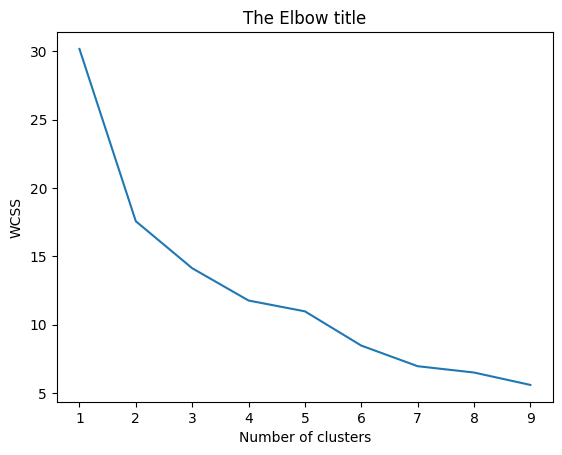

In [18]:
#run kmeans with various number of k. evaluate no. of k based on the elbow plot

wcss=[]
max_k = 10

for i in range(1, max_k):
    kmeans = KMeans(n_clusters=i, n_init='auto')
    kmeans.fit(umap_embed_comments_array)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
    number_clusters = range(1, max_k)

plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [19]:
#run kmeans with no. of clusters you see fit the most
k = 3
kmeans = KMeans(n_clusters = k, n_init='auto')
kmeans.fit(umap_embed_comments_array)
df['KMeans ID'] = kmeans.labels_

In [20]:
#merge all reviews of each cluster into one big sentence
df_kmeans = pd.DataFrame(columns=["KMeans ID", "texts"])

for i in range(0, k):
    row = []
    row.append(i)
    row.append(df['comment'][df['KMeans ID'] == i].to_string())
    df_kmeans.loc[len(df_kmeans)] = row

In [21]:
df_kmeans

,KMeans ID,texts
0,0,4 สินค้าดีมีคุณภาพมากๆ ใช้แล้วมั่นใจในความ...
1,1,0 เป็นปลั้กพ่วงที่ใช้ดีมาก มีพอทชาร์จ usb ...
2,2,1 สินค้าดีราคาถูก คุ้มค่า มีรับประกันด้วย ...


In [22]:
#create regex compiler for removal of a character you don't want
special_characters = "/[!@#$%^&*']/g"
specialchar_pattern = re.compile(special_characters)

In [23]:
#create regex compiler for removal of any emoji
emoji_pattern = re.compile("["
u"\U0001F600-\U0001F64F" # emoticons
u"\U0001F300-\U0001F5FF" # symbols & pictographs
u"\U0001F680-\U0001F6FF" # transport & map symbols
u"\U0001F1E0-\U0001F1FF" # flags (iOS)
"]+", flags=re.UNICODE)

#create regex compiler for removal of digit
number_pattern = re.compile("[0-9]")
#create regex compiler for removal of white space
space_pattern = re.compile("\s+")
#create regex compiler for removal of .
dot_pattern = re.compile(r"\.+")
#create regex compiler for removal of \
backslash_pattern = re.compile(r"\\+")

In [24]:
#define a function to tokenize a sentence into words - you can define words you want to remove as well as new words for tokenization
stopwords = list(pythainlp.corpus.thai_stopwords())
removed_words = ['',' ','    ','\n', '(', ')', '?', '+', '--', '//', 'ร้าน', '\u200b', 'ๆ(', '..', 'ๆๆๆๆ', 'ๆ', 'นะคะ', '-', '!', "['", "','", 'ครกไม้', 'ไทยลาว',"'", ',', '[', 'ลาดปลาเค้า', 'ย่าน', 'ลาด', 'ปลา', 'เค้า']
screening_words = stopwords + removed_words

# words = new_words.union(thai_words())
# custom_dictionary_trie = Trie(words)

In [25]:
#define a function to tokenize a sentence into words - you can define words you want to remove as well as new words for tokenization
def tokenize_to_list(sentence):
    merged = []
    words = pythainlp.word_tokenize(str(sentence), engine='deepcut')

    for word in words:
        if word not in screening_words:
            merged.append(word)
    return merged

In [26]:
df_kmeans['texts'] = df_kmeans['texts'].apply(lambda x: emoji_pattern.sub(r'', x))
df_kmeans['texts'] = df_kmeans['texts'].apply(lambda x: specialchar_pattern.sub(r'', x))
df_kmeans['texts'] = df_kmeans['texts'].apply(lambda x: number_pattern.sub(r'', x))
df_kmeans['texts'] = df_kmeans['texts'].apply(lambda x: space_pattern.sub(r'', x))
df_kmeans['texts'] = df_kmeans['texts'].apply(lambda x: dot_pattern.sub(r'', x))
df_kmeans['texts'] = df_kmeans['texts'].apply(lambda x: backslash_pattern.sub(r'', x))
df_kmeans['texts_tokenized'] = df_kmeans['texts'].apply(lambda x: tokenize_to_list(x))
df_kmeans['texts_count'] = df_kmeans['texts_tokenized'].apply(lambda x:collections.Counter(x).most_common())

7/7 [==============================] - 0s 13ms/step


In [27]:
df_kmeans

,KMeans ID,texts,texts_tokenized,texts_count
0,0,สินค้าดีมีคุณภาพมากๆใช้แล้วมั่นใจในความปลอดภัก...,"[สินค้า, ดี, คุณภาพ, มั่นใจ, ปลอด, ภัการ, จัดส...","[(สินค้า, 4), (ดี, 2), (ค้า, 2), (คุณภาพ, 1), ..."
1,1,เป็นปลั้กพ่วงที่ใช้ดีมากมีพอทชาร์จusbมาให้ดปลั...,"[ปลั้ก, พ่วง, ดี, พอทชาร์จusb, ดปลั๊ก, ยี่ห้อ,...","[(ดี, 7), (สินค้า, 5), (ไฟ, 5), (สั่ง, 4), (ปล..."
2,2,สินค้าดีราคาถูกคุ้มค่ามีรับประกันด้วยออกแบบสิน...,"[สินค้า, ดี, ราคา, คุ้ม, ค่า, รับประกัน, สินค้...","[(สินค้า, 8), (ดี, 5), (ราคา, 2), (คุ้มค่า, 2)..."


In [28]:
# show top key word of each cluster

top_n_words = 10
for i in range(0, len(df_kmeans)):
    print(f"Cluster ID : {i}\n")
    print(f"Most common words include : {list(df_kmeans['texts_count'][i])[:top_n_words]}\n")

Cluster ID : 0

Most common words include : [('สินค้า', 4), ('ดี', 2), ('ค้า', 2), ('คุณภาพ', 1), ('มั่นใจ', 1), ('ปลอด', 1), ('ภัการ', 1), ('จัดส่ง', 1), ('สั่งการ', 1), ('แพ็ค', 1)]

Cluster ID : 1

Most common words include : [('ดี', 7), ('สินค้า', 5), ('ไฟ', 5), ('สั่ง', 4), ('ปลั๊ก', 4), ('ช่อง', 3), ('Toshino', 2), ('สาย', 2), ('งาน', 2), ('แพค', 2)]

Cluster ID : 2

Most common words include : [('สินค้า', 8), ('ดี', 5), ('ราคา', 2), ('คุ้มค่า', 2), ('คุ้ม', 1), ('ค่า', 1), ('รับประกัน', 1), ('ไว', 1), ('แพง', 1), ('เลือก', 1)]



 ## cosine similarity clustering

In [29]:
#clustering using agglomorative clustering
knn_graph = kneighbors_graph(embed_comments_array, 5, include_self=False)
model = AgglomerativeClustering(
linkage="average", connectivity=knn_graph, n_clusters=10, metric="cosine")
model.fit(embed_comments_array)
df['Agglomerative ID'] = model.labels_

In [30]:
#merge all reviews of each cluster into one big sentence
df_Agglomerative = pd.DataFrame(columns=["Agglomerative ID", "texts"])
for i in range(0, k):
    row = []
    row.append(i)
    row.append(str(df['comment'][df['Agglomerative ID'] == i].tolist()))
    df_Agglomerative.loc[len(df_Agglomerative)] = row

In [31]:
#clean and tokenize sentences. count the occurences of each word
df_Agglomerative['texts'] = df_Agglomerative['texts'].apply(lambda x: emoji_pattern.sub(r'', x))
df_Agglomerative['texts'] = df_Agglomerative['texts'].apply(lambda x: specialchar_pattern.sub(r'', x))
df_Agglomerative['texts'] = df_Agglomerative['texts'].apply(lambda x: number_pattern.sub(r'', x))
df_Agglomerative['texts'] = df_Agglomerative['texts'].apply(lambda x: space_pattern.sub(r'', x))
df_Agglomerative['texts'] = df_Agglomerative['texts'].apply(lambda x: dot_pattern.sub(r'', x))
df_Agglomerative['texts'] = df_Agglomerative['texts'].apply(lambda x: backslash_pattern.sub(r'', x))
df_Agglomerative['texts_tokenized'] = df_Agglomerative['texts'].apply(lambda x: tokenize_to_list(x))
df_Agglomerative['texts_count'] = df_Agglomerative['texts_tokenized'].apply(lambda x:
collections.Counter(x).most_common())

12/12 [==============================] - 0s 13ms/step


In [32]:
#show top keywords of each cluster
top_N_words = 10
for i in range(0, len(df_Agglomerative)):
    print(f"Cluster ID : {i}\n")
    print(f"Most common words include :{list(df_Agglomerative['texts_count'][i])[:top_N_words]}\n")

Cluster ID : 0

Most common words include :[('ดี', 32), ('สินค้า', 32), ('ช่อง', 10), ('ปลั๊ก', 10), ('ไฟ', 9), ('งาน', 6), ('คุณภาพ', 6), ('ยี่ห้อ', 5), ('ค้า', 5), ('สาย', 4)]

Cluster ID : 1

Most common words include :[('ดี', 7), ('เสียหาย', 2), ('รีวิว', 2), ('แพคมา', 2), ('แพคส่ง', 1), ('ไวดี', 1), ('ห่อ', 1), ('ภาพ', 1), ('แนบ', 1), ('ใบ', 1)]

Cluster ID : 2

Most common words include :[('บับเบิ้ล', 2), ('กล่อง', 2), ('ไฟ', 2), ('เสียบ', 2), ('/', 2), ('ลอง', 2), ('แพคมา', 1), ('ดี', 1), ('หนา', 1), ('สภาพ', 1)]

